<a href="https://colab.research.google.com/github/jabes-christian/Instagram-Influencers-Analysis/blob/main/Instagram_Influencers_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados dos principais influenciadores do Instagram (limpos)**
Analisando dados dos principais influenciadores do Instagram

## **Sobre o Instagram**
O Instagram é um aplicativo de mídia social onde usuários podem postar fotos e vídeos, aplicar filtros, usar hashtags e marcar locais. As publicações podem ser compartilhadas com todos ou apenas com seguidores selecionados. A plataforma permite explorar conteúdo de outros usuários, interagir com curtidas e seguir perfis para acompanhar as novidades. Além disso, o Instagram se tornou um espaço influente, onde usuários com muitos seguidores podem impactar significativamente a opinião pública.

## 1: Usamos a API do Kaggle para interagir com o dataset escolhido!

In [3]:
# Importando as biblioteca:
from google.colab import files

In [4]:
# Baixando o arquivo JSON:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jabeschristian","key":"cd853033ee2c81512b48d27a770bc218"}'}

In [5]:
# Instalando as biblioteca:
!pip install kaggle -q

In [6]:
# Criando a pasta oculta ".kaggle" no diretório home para armazenar as credenciais
!mkdir -p ~/.kaggle

In [7]:
# Movendo o arquivo "kaggle.json" para a pasta criada
!cp kaggle.json ~/.kaggle/

In [8]:
# Alterando as permissões do arquivo para evitar problemas de segurança
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
# Listando os datasets disponíveis no Kaggle (opcional, apenas para conferência)
!kaggle datasets list

ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                 Chocolate Sales Data 📊🍫                                  14473  2025-03-19 03:51:40.270000          12184        213  1.0              
adilshamim8/student-depression-dataset                            Student Depression Dataset                              467020  2025-03-13 03:12:30.423000           4481         70  1.0              
abdulmalik1518/mobiles-dataset-2025                               Mobiles Dataset (2025)                                   20314  2025-02-18 06:50:24.370000          17707        295  1.0     

In [10]:
# Criando a pasta "dataset"
!mkdir dataset

In [11]:
# Baixando o dataset do Kaggle diretamente para a pasta "dataset"
!kaggle datasets download -d surajjha101/top-instagram-influencers-data-cleaned -p dataset

Dataset URL: https://www.kaggle.com/datasets/surajjha101/top-instagram-influencers-data-cleaned
License(s): CC0-1.0


In [12]:
# Descompactando o arquivo zip na pasta "dataset" e renomeando a pasta descompactada
!unzip dataset/top-instagram-influencers-data-cleaned.zip -d dataset/

Archive:  dataset/top-instagram-influencers-data-cleaned.zip
  inflating: dataset/top_insta_influencers_data.csv  


In [13]:
# Removendo o arquivo zip original (opcional)
!rm dataset/top-instagram-influencers-data-cleaned.zip

## 2: Carregamento dos Dados

In [14]:
# Importando as bibliotecas para a Análise de Exploratória dos Dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Carregando o dataset
df = pd.read_csv('dataset/top_insta_influencers_data.csv')
df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


## 3: Exploração e Tranformação dos Dados

In [16]:
# Visualiazando as 10 primeiras linhas do dataframe
df.head(10)

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States
6,7,arianagrande,92,5.0k,327.7m,3.7m,1.20%,3.9m,18.4b,United States
7,8,beyonce,92,2.0k,272.8m,3.6m,0.76%,2.0m,7.4b,United States
8,9,khloekardashian,89,4.1k,268.3m,2.4m,0.35%,926.9k,9.8b,United States
9,10,justinbieber,91,7.4k,254.5m,1.9m,0.59%,1.5m,13.9b,Canada


In [17]:
# Visualiazando as 10 ultimas linhas do dataframe
df.tail(10)

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
190,191,bmw,79,9.3k,33.7m,231.3k,0.23%,76.5k,2.2b,Germany
191,192,danbilzerian,84,1.4k,33.6m,2.0m,3.58%,1.2m,2.8b,Canada
192,193,khabib_nurmagomedov,63,4.5k,33.5m,685.1k,0.67%,220.7k,3.1b,Russia
193,194,zidane,41,0.37k,33.5m,1.1m,1.61%,532.7k,391.9m,France
194,195,sonamkapoor,75,4.8k,33.3m,264.7k,0.63%,209.2k,1.3b,India
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States
199,200,raisa6690,80,4.2k,32.8m,232.2k,0.30%,97.4k,969.1m,Indonesia


In [18]:
# Informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


## **Informações sobre as colunas do dataset**

**rank**: Classificação do Influenciador com base no número de seguidores que ele tem

**channel_info**: Nome de usuário do Instagrammer

**influence_score**: Pontuação de influência dos usuários. É calculado com base em menções, importância e popularidade

**posts**: Número de posts que eles fizeram até agora

**followers**: Número de seguidores do usuário

**avg_likes**: Média de curtidas em posts do Instagrammer (total de curtidas/total de posts)

**60_day_eng_rate**: Taxa de engajamento dos últimos 60 dias do Instagrammer como facção de engajamentos que eles fizeram até agora

**new_post_avg_like**: Média de curtidas que eles têm em novos posts

**total_likes**: Total de curtidas que o usuário obteve em seus posts. (em bilhões)

**country**: País ou região de origem do usuário.

In [19]:
# Verificando linhas duplicadas
print(df.duplicated().sum())

0


In [20]:
# Estatísticas descritivas (numéricas)
df.describe()

,rank,influence_score
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


In [21]:
# Estatísticas descritivas (categóricas)
df.describe(include='object')

,channel_info,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
count,200,200,200,200,200,200,200,138
unique,200,99,165,135,147,162,116,25
top,cristiano,10.0k,33.2m,1.1m,0.02%,0,1.6b,United States
freq,1,13,3,13,5,8,9,66


In [22]:
# Estatistica da 10 primeiras classificações do total de likes
df[['rank','total_likes']].head(10)

,rank,total_likes
0,1,29.0b
1,2,57.4b
2,3,6.0b
3,4,11.5b
4,5,12.5b
5,6,19.9b
6,7,18.4b
7,8,7.4b
8,9,9.8b
9,10,13.9b


In [23]:
# Substituindo colunas especificadas do dataset e convertendo-as para float
replace = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}
converte_colunas = ['total_likes', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like']
df[converte_colunas] = df[converte_colunas].replace(replace, regex=True).astype(float)
df[converte_colunas]

,total_likes,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like
0,2.900000e+10,3300.0,475800000.0,8700000.0,1.39,6500000.0
1,5.740000e+10,6900.0,366200000.0,8300000.0,1.62,5900000.0
2,6.000000e+09,890.0,357300000.0,6800000.0,1.24,4400000.0
3,1.150000e+10,1800.0,342700000.0,6200000.0,0.97,3300000.0
4,1.250000e+10,6800.0,334100000.0,1900000.0,0.20,665300.0
...,...,...,...,...,...,...
195,1.400000e+09,2300.0,33200000.0,623800.0,1.40,464700.0
196,1.500000e+09,3800.0,33200000.0,390400.0,0.64,208000.0
197,1.492000e+08,770.0,33200000.0,193300.0,0.26,82600.0
198,1.700000e+09,2300.0,33000000.0,719600.0,1.42,467700.0


In [24]:
# Renomeando a coluna 'channel_info' para 'account_name'
df.rename(columns={'channel_info': 'account_name'}, inplace=True)

In [25]:
# Exibindo informações atualizadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   account_name       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    float64
 4   followers          200 non-null    float64
 5   avg_likes          200 non-null    float64
 6   60_day_eng_rate    199 non-null    float64
 7   new_post_avg_like  200 non-null    float64
 8   total_likes        200 non-null    float64
 9   country            138 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 15.8+ KB


In [26]:
# Calculando matriz de correlação para colunas numéricas
colunas_numericas =['influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
correlacao_df = df[colunas_numericas].corr()
correlacao_df

,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
influence_score,1.000000,0.160068,0.367713,0.051478,-0.081891,0.036548,0.237675
posts,0.160068,1.000000,0.060398,-0.343087,-0.324068,-0.290080,0.233328
followers,0.367713,0.060398,1.000000,0.349195,-0.100905,0.300914,0.667539
avg_likes,0.051478,-0.343087,0.349195,1.000000,0.754587,0.845978,0.357940
60_day_eng_rate,-0.081891,-0.324068,-0.100905,0.754587,1.000000,0.869202,-0.019524
new_post_avg_like,0.036548,-0.290080,0.300914,0.845978,0.869202,1.000000,0.329326
total_likes,0.237675,0.233328,0.667539,0.357940,-0.019524,0.329326,1.000000


In [27]:
# Classificação com base na coluna influence_score
df.sort_values(by='influence_score', inplace=True)
df.tail(10)

,rank,account_name,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States
13,14,taylorswift,91,530.0,222200000.0,2400000.0,1.01,2300000.0,1.300000e+09,United States
11,12,natgeo,91,10000.0,237000000.0,302200.0,0.07,159300.0,3.000000e+09,United States
9,10,justinbieber,91,7400.0,254500000.0,1900000.0,0.59,1500000.0,1.390000e+10,Canada
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
7,8,beyonce,92,2000.0,272800000.0,3600000.0,0.76,2000000.0,7.400000e+09,United States
6,7,arianagrande,92,5000.0,327700000.0,3700000.0,1.20,3900000.0,1.840000e+10,United States
20,21,katyperry,92,2000.0,170300000.0,715000.0,0.16,265100.0,1.500000e+09,NaN
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States


In [28]:
df.shape

(200, 10)

In [29]:
# Verificando valores ausentes
df.isnull().sum()

,0
rank,0
account_name,0
influence_score,0
posts,0
followers,0
avg_likes,0
60_day_eng_rate,1
new_post_avg_like,0
total_likes,0
country,62


In [30]:
# Definindo a coluna 'rank' como índice
df.set_index('rank')

,account_name,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
rank,,,,,,,,,
94,mosalah,22,840.0,52500000.0,1800000.0,2.18,1100000.0,1.500000e+09,NaN
194,zidane,41,370.0,33500000.0,1100000.0,1.61,532700.0,3.919000e+08,France
128,maisa,42,1500.0,44500000.0,553000.0,0.67,294100.0,8.201000e+08,Brazil
77,karimbenzema,42,2000.0,56900000.0,878500.0,1.62,918900.0,1.800000e+09,Spain
175,nattinatasha,47,30.0,35900000.0,518100.0,0.80,285900.0,1.870000e+07,Czech Republic
...,...,...,...,...,...,...,...,...,...
1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
8,beyonce,92,2000.0,272800000.0,3600000.0,0.76,2000000.0,7.400000e+09,United States
7,arianagrande,92,5000.0,327700000.0,3700000.0,1.20,3900000.0,1.840000e+10,United States


In [41]:
print("Shape of Dataset:- ",df.shape)
df.head().style.background_gradient(cmap='YlOrRd')

Shape of Dataset:-  (200, 10)


,rank,account_name,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
93,94,mosalah,22,840.000000,52500000.000000,1800000.000000,2.180000,1100000.000000,1500000000.000000,nan
193,194,zidane,41,370.000000,33500000.000000,1100000.000000,1.610000,532700.000000,391900000.000000,France
127,128,maisa,42,1500.000000,44500000.000000,553000.000000,0.670000,294100.000000,820100000.000000,Brazil
76,77,karimbenzema,42,2000.000000,56900000.000000,878500.000000,1.620000,918900.000000,1800000000.000000,Spain
174,175,nattinatasha,47,30.000000,35900000.000000,518100.000000,0.800000,285900.000000,18700000.000000,Czech Republic


In [31]:
# Explorando os principais influenciadores por país
top_inf = df.groupby('country')[['account_name', 'influence_score']].apply(lambda x: x.nlargest(1, 'influence_score')).reset_index(drop=True)
top_inf

,account_name,influence_score
0,norafatehi,83
1,chrishemsworth,86
2,neymarjr,90
3,mercedesbenz,77
4,justinbieber,91
5,jamesrodriguez10,86
6,nattinatasha,47
7,hrithikroshan,85
8,psg,86
9,bmw,79


In [32]:
# Calculando valores médios para colunas selecionadas por país
media_por_pais = df.groupby('country')[['followers', 'avg_likes','total_likes']].mean().reset_index()
media_por_pais

,country,followers,avg_likes,total_likes
0,Anguilla,4.160000e+07,1.400000e+06,2.300000e+09
1,Australia,5.590000e+07,2.800000e+06,2.500000e+09
2,Brazil,5.660769e+07,8.351846e+05,3.151485e+09
3,British Virgin Islands,3.600000e+07,1.979000e+05,2.000000e+09
4,Canada,1.193333e+08,2.466667e+06,8.500000e+09
5,Colombia,5.203333e+07,9.938667e+05,5.033333e+09
6,Czech Republic,3.590000e+07,5.181000e+05,1.870000e+07
7,CÃ´te d'Ivoire,4.370000e+07,1.600000e+06,9.499000e+08
8,France,4.483333e+07,7.697333e+05,1.745217e+09
9,Germany,3.370000e+07,2.313000e+05,2.200000e+09


## 4: Visualização dos Dados

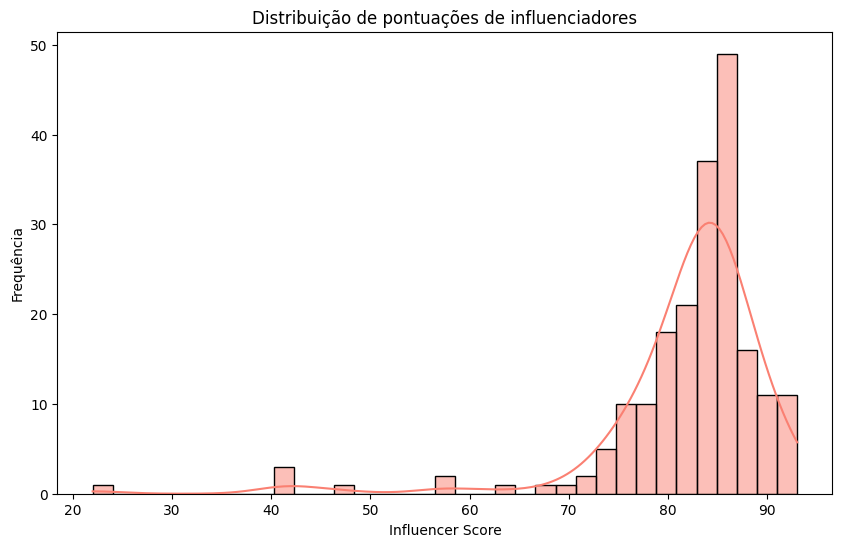

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['influence_score'], kde=True, color='salmon')
plt.title('Distribuição de pontuações de influenciadores')
plt.xlabel('Influencer Score')
plt.ylabel('Frequência')
plt.show()

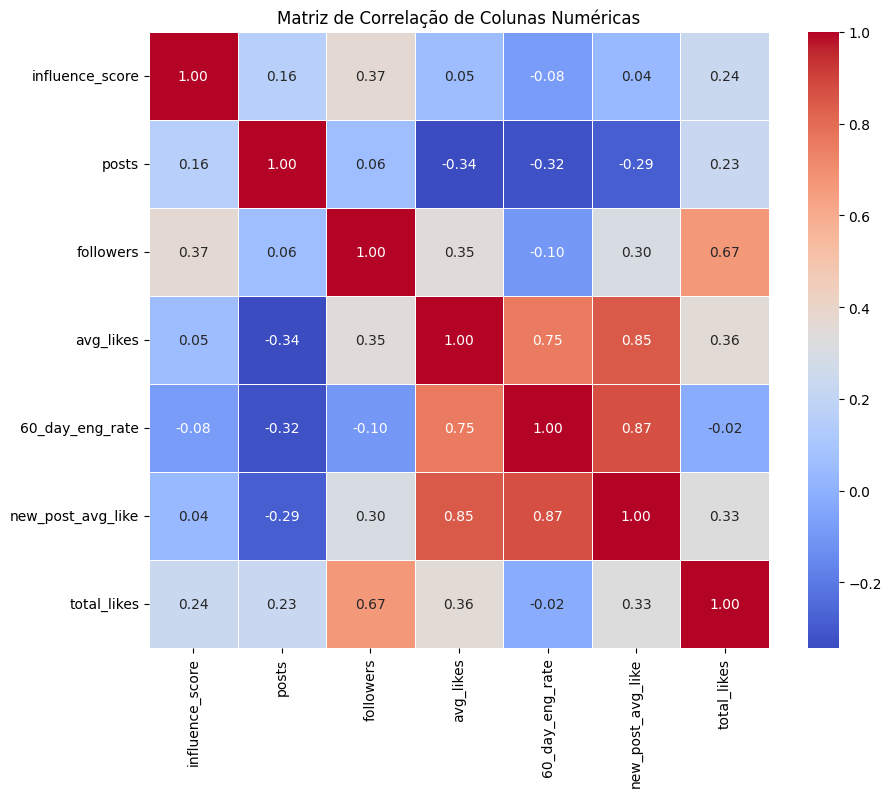

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação de Colunas Numéricas')
plt.show()

<ipython-input-35-7380a73be328>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pais, y=nome_pais, palette='viridis')


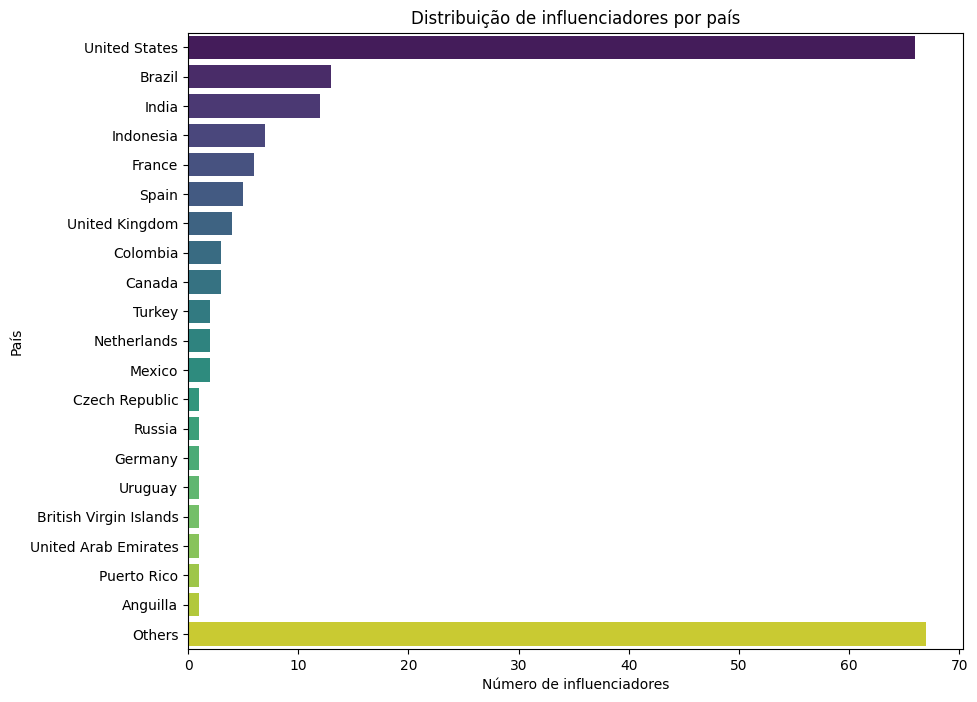

In [35]:
pais = df['country'].value_counts()[:20].to_list()
nome_pais = df['country'].value_counts().index[:20].to_list()

nome_pais.append("Others")
max20 = sum(pais)
others = len(df) - max20

pais.append(others)

plt.figure(figsize=(10, 8))
sns.barplot(x=pais, y=nome_pais, palette='viridis')
plt.title('Distribuição de influenciadores por país')
plt.xlabel('Número de influenciadores')
plt.ylabel('País')
plt.show()

<ipython-input-36-04e95bd89513>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='influence_score', data=df, palette='pastel')


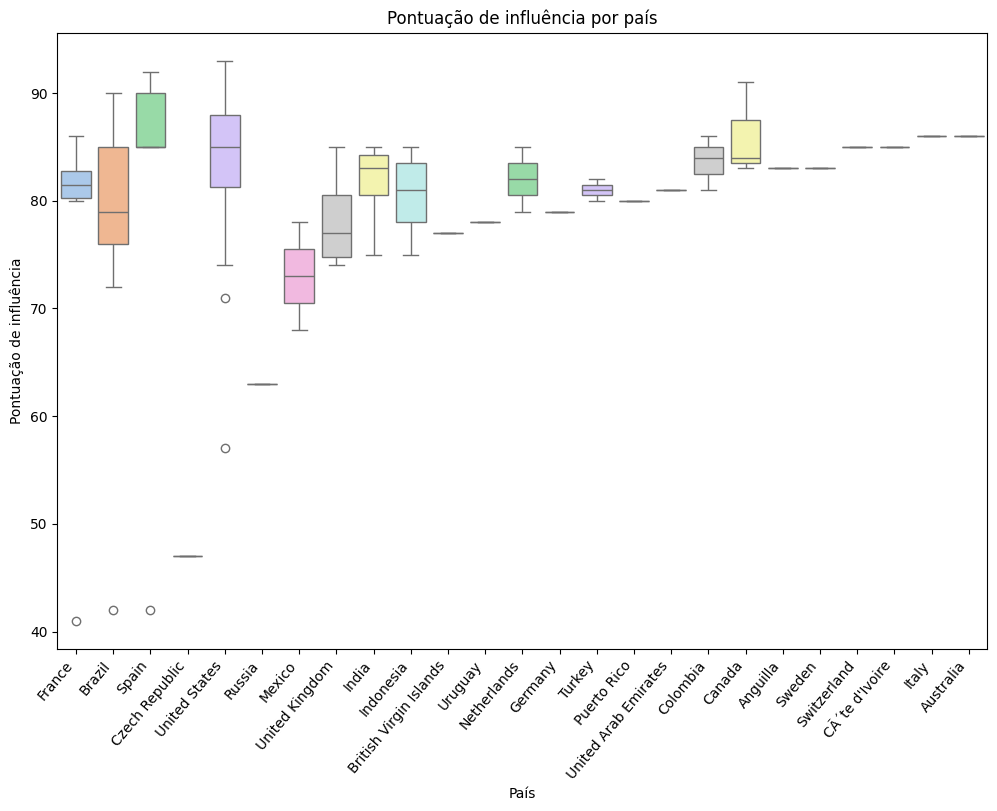

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='influence_score', data=df, palette='pastel')
plt.title('Pontuação de influência por país')
plt.xlabel('País')
plt.ylabel('Pontuação de influência')
plt.xticks(rotation=50, ha='right')
plt.show()

<Figure size 1200x800 with 0 Axes>

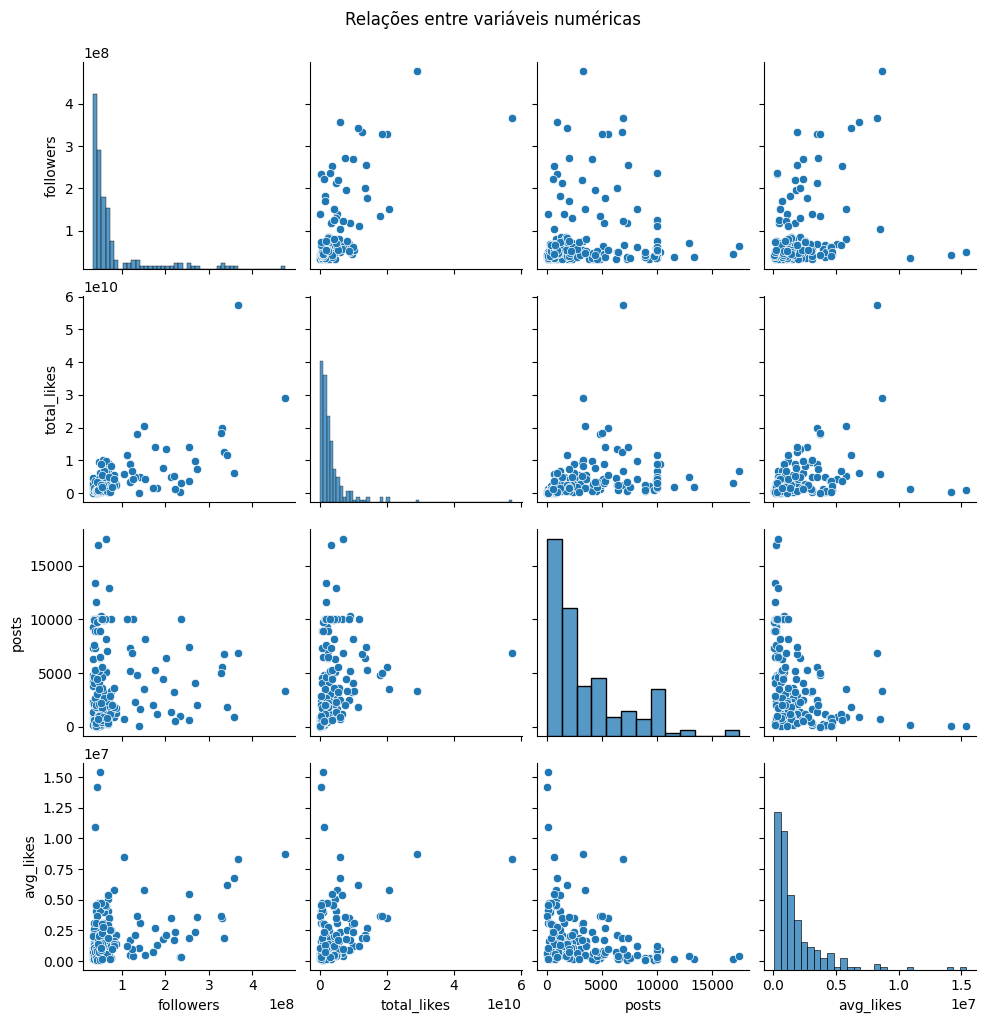

In [39]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[['followers', 'total_likes', 'posts', 'avg_likes']])
plt.suptitle('Relações entre variáveis ​​numéricas', y=1.02)
plt.show()

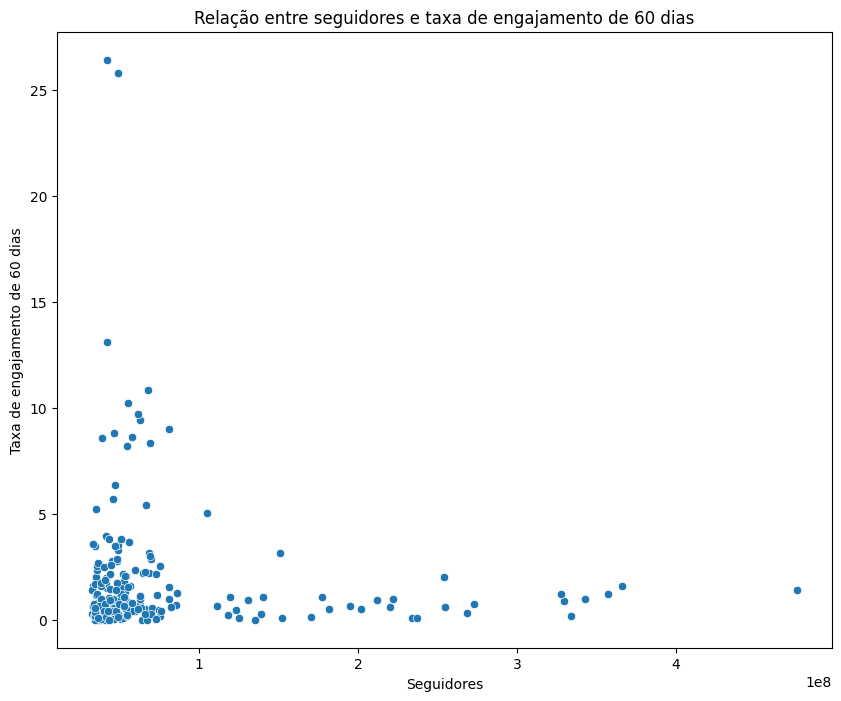

In [40]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='followers', y='60_day_eng_rate', data=df)
plt.title('Relação entre seguidores e taxa de engajamento de 60 dias')
plt.xlabel('Seguidores')
plt.ylabel('Taxa de engajamento de 60 dias')
plt.show()